<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Deutschland_COVID19_SHAP_0to75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total 106-121

In [1]:
%pip install shap
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

# Data

In [3]:
df = pd.read_stata('W:\COVID19\std_inz106_121.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [4]:
df.head()

,D_v404,D_v405,D_v406,D_v423,D_v424,D_v425,D_v442,D_Abhaen,D_Auslae,D_v483,...,G_Pendler_Potsdam,G_latitude,G_longitude,G_distance_Ischgl,Flag100_Pendler_Coesfeld,Flag100_Pendler_Rosenheim,Flag100_Pendler_Goettingen,std_inz_91to106,std_inz_106to121,eastwest
0,46.000000,12.4,-2.5,0.93,2.4,12.3,1.04,38.299999,9.1,3.2,...,0.0,50.549999,7.116667,457.259216,0.0,0.0,0.0,28.917685,9.130560,1.0
1,43.000000,16.0,-3.5,0.94,4.2,7.6,1.00,29.900000,8.0,2.9,...,0.0,48.466667,11.133333,173.721573,0.0,0.0,0.0,93.475174,26.149586,1.0
2,42.500000,14.9,-2.3,0.88,4.0,6.3,0.98,28.900000,12.6,4.0,...,0.0,48.400002,9.983334,156.045456,0.0,0.0,0.0,104.266823,50.689297,1.0
3,49.700001,-1.4,-7.5,0.88,-4.3,-13.3,1.04,50.799999,3.2,2.0,...,0.0,50.983334,12.433333,468.846863,0.0,0.0,0.0,15.950323,17.793818,0.0
4,44.700001,9.4,-1.5,0.93,-0.3,-7.4,1.02,34.099998,7.2,2.1,...,0.0,50.683334,7.650000,451.906799,0.0,0.0,0.0,45.772846,30.634008,1.0


In [5]:
Y = df['std_inz_106to121']
X = df.loc[:, ~df.columns.isin(['std_inz_106to121', 'eastwest'])]

# RF model

In [6]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
rf.fit(X, Y)  

RandomForestRegressor(n_estimators=5000, random_state=0)

# SHAP values

In [7]:
#Kshap_values = shap.KernelExplainer(rf.predict, X).shap_values(X, nsamples=100)
shap_values = shap.TreeExplainer(rf).shap_values(X)

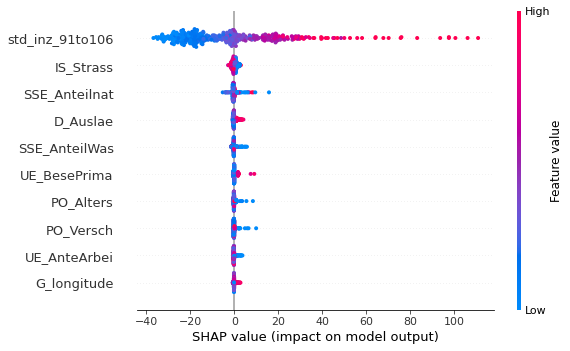

In [8]:
#shap.summary_plot(Kshap_values, X,max_display=10) #KernelExplainer
shap.summary_plot(shap_values, X,max_display=10)  #TreeExpliner

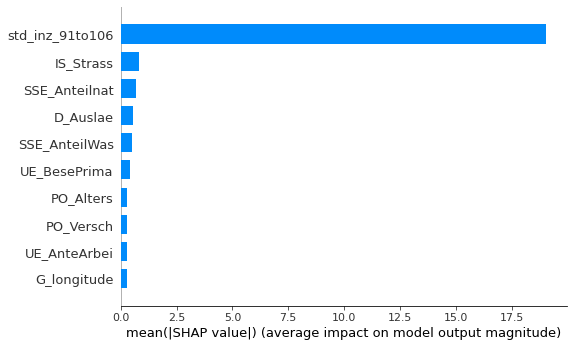

In [9]:
#shap.summary_plot(Kshap_values, X, plot_type="bar",max_display=10)
shap.summary_plot(shap_values, X, plot_type="bar",max_display=10)